MSE: 98020915.65
R² Score: -0.21


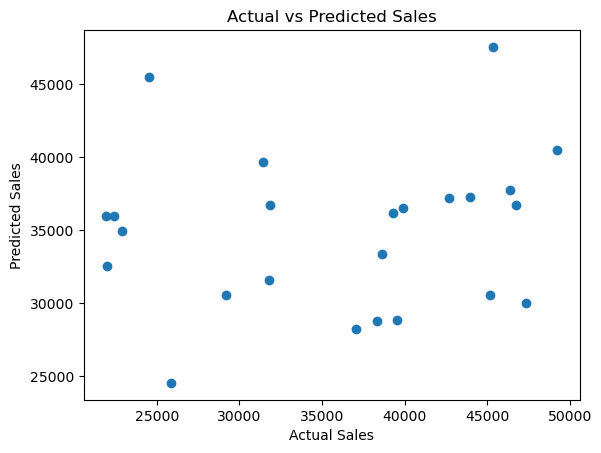

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ایجاد داده‌های مصنوعی بیشتر (Generate more artificial data)
np.random.seed(42)
data = {
    'Month': np.tile(np.arange(1, 13), 10),  # 10 سال مختلف (12 months for 10 years)
    'Marketing_Spend': np.random.randint(1000, 5000, 120),  # 120 نمونه (120 samples)
    'Season': np.random.choice(['High', 'Medium', 'Low'], 120),
    'Sales': np.random.randint(20000, 50000, 120)  # 120 مقدار فروش (120 sales values)
}

df = pd.DataFrame(data)

# تبدیل ویژگی "Season" به مقادیر عددی (Convert 'Season' feature to numerical values)
df['Season'] = df['Season'].map({'High': 3, 'Medium': 2, 'Low': 1})

# ویژگی‌ها و هدف (Features and target)
X = df[['Month', 'Marketing_Spend', 'Season']]
y = df['Sales']

# تقسیم داده به مجموعه‌های آموزشی و آزمایشی (Split data into training and testing sets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# آموزش مدل Random Forest (Train the Random Forest model)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# پیش‌بینی (Prediction)
y_pred = model.predict(X_test)

# ارزیابی مدل (Model evaluation)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# مصورسازی نتایج (Visualizing the results)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')  # مقدار واقعی فروش
plt.ylabel('Predicted Sales')  # مقدار پیش‌بینی شده فروش
plt.title('Actual vs Predicted Sales')  # عنوان نمودار
plt.show()
